In [1]:
#calling various library
import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime
fig = plt.figure()
time1=datetime.now().strftime('%Y-%m-%d %H:%M:%S')

<Figure size 432x288 with 0 Axes>

In [2]:
x_arr = np.loadtxt('age kvm x_arr_vts t_1.txt')                                      #all elements are in micron
y_arr = np.loadtxt('age kvm y_arr_vts t_1.txt')                                       #all elements are in micron
t_arr = np.loadtxt('age kvm dt_arr_vts t_1.txt')

In [3]:
len(x_arr)

26649

In [4]:
dt_min=1e-8                                                                   #initial time step
dt_max=1e2                                                                  #final time step in msd graph
msd_xarr=[]                                                                    #mean squared x
msd_yarr=[]                                                                    #mean squared y
msd_rarr=[]                                                                    #r is the msd array
mean_t_arr=[]                                                                  #dtarray for msd plot

N = 36
timelaglog= np.logspace( np.log10(dt_min), np.log10(dt_max), num=N ) #nonzero points for msd plot(distributed linearly in log scale)
counterarray=[]                                                                 #no of data averaging for particular dt


In [5]:
'''timelaglog'''

'timelaglog'

In [6]:
time1=datetime.now().strftime('%Y-%m-%d %H:%M:%S')

for m in range(0,len(timelaglog)-1):
    print(m)
    r=0 
    x=0
    y=0 
    count=0                                                                   #counter no of elements for data avraging for particular dt
    for i in range(len(t_arr)):
        for j in range(i+1,len(t_arr)):
            timelag = t_arr[j]-t_arr[i]                                       #time difference between i'th and j'th elements
            if timelag >= timelaglog[m]:
                if timelag <= timelaglog[m+1]:
                    x = x+((x_arr[j]-x_arr[i])**2)
                    y = y+((y_arr[j]-y_arr[i])**2)
                    count = count+1
                else:
                    break;
            else:
                break;           
    print('no. of  points in bin',count) 
    x=float(x/count)
    y=float(y/count)
    r=float(x+y) 
    msd_xarr.append(x)
    msd_yarr.append(y)                                                          #msd for a particual dt
    msd_rarr.append(r)
    mean_t_arr.append(np.sqrt(timelaglog[m]*timelaglog[m+1]))
    print( 'tau=', np.sqrt(timelaglog[m]*timelaglog[m+1]) )
    counterarray.append(count)
  
    
time2=datetime.now().strftime('%Y-%m-%d %H:%M:%S') # final time ending of the run time
print(time1)
print(time2) 

0
no. of  points in bin 629
tau= 1.3894954943731375e-08
1
no. of  points in bin 651
tau= 2.6826957952797245e-08
2
no. of  points in bin 658
tau= 5.179474679231207e-08
3
no. of  points in bin 657
tau= 9.999999999999989e-08
4
no. of  points in bin 668
tau= 1.9306977288832494e-07
5
no. of  points in bin 710
tau= 3.727593720314942e-07
6
no. of  points in bin 739
tau= 7.19685673001152e-07
7
no. of  points in bin 755
tau= 1.3894954943731374e-06
8
no. of  points in bin 740
tau= 2.682695795279725e-06
9
no. of  points in bin 714
tau= 5.179474679231207e-06
10
no. of  points in bin 781
tau= 9.99999999999999e-06
11
no. of  points in bin 760
tau= 1.9306977288832496e-05
12
no. of  points in bin 861
tau= 3.727593720314938e-05
13
no. of  points in bin 842
tau= 7.196856730011514e-05
14
no. of  points in bin 932
tau= 0.00013894954943731373
15
no. of  points in bin 902
tau= 0.00026826957952797245
16
no. of  points in bin 947
tau= 0.0005179474679231208
17
no. of  points in bin 1085
tau= 0.0009999999999999

In [7]:
'''np.savetxt('msd_x_iso.txt',msd_xarr)
np.savetxt('msd_y_iso.txt',msd_yarr)
np.savetxt('msd_r_iso.txt',msd_rarr)
np.savetxt('t_arr_formsd_iso.txt',mean_t_arr)
np.savetxt('counterarray.txt',counterarray)'''

"np.savetxt('msd_x_iso.txt',msd_xarr)\nnp.savetxt('msd_y_iso.txt',msd_yarr)\nnp.savetxt('msd_r_iso.txt',msd_rarr)\nnp.savetxt('t_arr_formsd_iso.txt',mean_t_arr)\nnp.savetxt('counterarray.txt',counterarray)"

In [8]:
msd_rarr = np.array(msd_rarr)
msd_xarr = np.array(msd_xarr)
msd_yarr = np.array(msd_yarr)

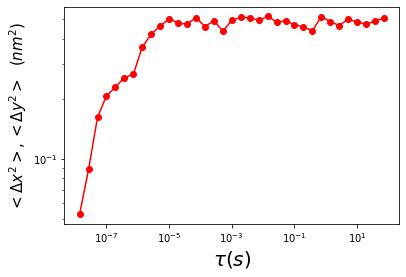

In [10]:
#plt.plot(mean_t_arr,msd_xarr*1e18,'bo-')
plt.plot(mean_t_arr,msd_yarr*1e18,'ro-')
plt.ylabel(r'$<\Delta x^2>,<\Delta y^2> \ \  (nm^2)$',size=15)
plt.xlabel(r'$\tau  (s)$',size=20)
plt.xscale('log')
plt.yscale('log')
#plt.savefig('mvm_iso_x_y_long.png')
plt.show()

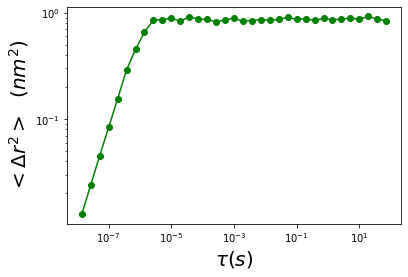

In [10]:
plt.plot(mean_t_arr,msd_rarr*1e18,'go-')
plt.ylabel(r'$<\Delta r^2> \ \  (nm^2)$',size=20)
plt.xlabel(r'$\tau  (s)$',size=20)
plt.xscale('log')
plt.yscale('log')
#plt.savefig('mvm_iso_long.png')
plt.show()

In [11]:
'''import numpy
a = numpy.asarray([ mean_t_arr, msd_rarr, msd_xarr, msd_yarr])
index = ['time', 'msd_r', 'msd_x', 'msd_y']

import pandas as pd
df_a = pd.DataFrame(a, index)
df_a_tp = pd.DataFrame.transpose(df_a)

numpy.savetxt("mvm_vts_iso_2.csv", df_a_tp, delimiter=",")'''

'import numpy\na = numpy.asarray([ mean_t_arr, msd_rarr, msd_xarr, msd_yarr])\nindex = [\'time\', \'msd_r\', \'msd_x\', \'msd_y\']\n\nimport pandas as pd\ndf_a = pd.DataFrame(a, index)\ndf_a_tp = pd.DataFrame.transpose(df_a)\n\nnumpy.savetxt("mvm_vts_iso_2.csv", df_a_tp, delimiter=",")'